# Permutation-Computed Significance - Multivariate Analysis of Variance

## Bio-Sediment Interactions

### Prep Dataframes

In [2]:
### ------------ Load data and package -----------------------------------------
### Load vegan package
library(vegan)
library(dplyr)
library(ggplot2)
library(vegan3d)

In [15]:
### Load and assemble the data
proj_path = '/Users/parisp15/OneDrive - East Carolina University/Projects/USCRP_Pea_Island_2020_2021/'
data_path = 'miscellaneous/Final Results Paper/Final_Data_Sets/'   #use_these_data_for_analysis/'
bio_data_file_name = 'bio_data_2_R.csv'
sed_data_file_name = 'sed_data_2_R.csv'

# full_data_path = paste(proj_path, data_path, data_file_name, sep="")
df_bio <- read.csv(file = paste(proj_path, data_path, bio_data_file_name, sep=""))
df_sed <- read.csv(file = paste(proj_path, data_path, sed_data_file_name, sep=""))

df <- merge(df_bio, df_sed, by='Primary_Key')

## remove taxa recs where there are 0 counts for all swash species (bray distance
## measures don't work if you have all 0 abundance densities for one or more recs):
## NO NEED TO DO THIS IF you're using Euclidean distances...
df <- filter(df, E_talpoida != 0 | Donax != 0 | Amphipods != 0 | Annelids != 0 | O_quadrata != 0)

# extract a random sample from original data frame
### do this because the original is too big
### will run out of memory on execution of ANOVA, otherwise
set.seed(49)
df <- df[sample(nrow(df), 35), ]

###  swash taxa df (E. talpoida, Donax spp., Amphipods, & Annelids):
# use square root to reduce influence of E. talpoida populations relative to others
taxa <- sqrt( df[c(5:9)] )

### spatio-temporal environment vars df (area, year, month, season, spoch):
taxa.env <- df[c(16:35)]

### ------------ COMPUTE DISTANCE MATRIX ---------------------------------------
taxa.dist <- vegdist(taxa, method='bray')

In [16]:
colnames(taxa.env)

[1] "X.gravels"   "X.gravels.1" "X.gravels.2" "X.gravels.3" "X.gravels.4"
 [6] "X.c_sands"   "X.c_sands.1" "X.c_sands.2" "X.c_sands.3" "X.c_sands.4"
[11] "X.m_sands"   "X.m_sands.1" "X.m_sands.2" "X.m_sands.3" "X.m_sands.4"
[16] "X.f_sands"   "X.f_sands.1" "X.f_sands.2" "X.f_sands.3" "X.f_sands.4"

## PerMANOVA

### Lower swash

In [ ]:
per_result <- adonis2(taxa.dist ~ X.gravels*X.c_sands*X.m_sands*X.f_sands, data=taxa.env, permutations=999, method="euclidean")
per_result

## non-Metric Multi-Dimensional Scaling:

In [10]:
### ------------ NMDS ----------------------------------------------------------
### Run NMDS (default is bray)
nmds <- metaMDS(taxa, k=3, distance='bray', autotransform = FALSE)
nmds$stress

Run 0 stress 9.585335e-05 
Run 1 stress 0.0002790399 
... Procrustes: rmse 0.03598632  max resid 0.1210111 
Run 2 stress 0.0003567233 
... Procrustes: rmse 0.03598234  max resid 0.1315947 
Run 3 stress 0.0003295452 
... Procrustes: rmse 0.03413651  max resid 0.133046 
Run 4 stress 0.0002573812 
... Procrustes: rmse 0.03549871  max resid 0.1194797 
Run 5 stress 0.001033184 
Run 6 stress 0.0003082072 
... Procrustes: rmse 0.03327836  max resid 0.1114018 
Run 7 stress 0.0008456244 
Run 8 stress 0.0003280287 
... Procrustes: rmse 0.03123136  max resid 0.1301774 
Run 9 stress 0.0003933784 
... Procrustes: rmse 0.03078389  max resid 0.1296766 
Run 10 stress 0.0002718792 
... Procrustes: rmse 0.03612233  max resid 0.123171 
Run 11 stress 0.0003896178 
... Procrustes: rmse 0.03340869  max resid 0.1059121 
Run 12 stress 0.0002517212 
... Procrustes: rmse 0.03674481  max resid 0.1182939 
Run 13 stress 0.0009119063 
Run 14 stress 0.000381464 
... Procrustes: rmse 0.03482156  max resid 0.1111519 


Warning message in metaMDS(taxa, k = 3, distance = "bray", autotransform = FALSE):
“stress is (nearly) zero: you may have insufficient data”


[1] 9.585335e-05

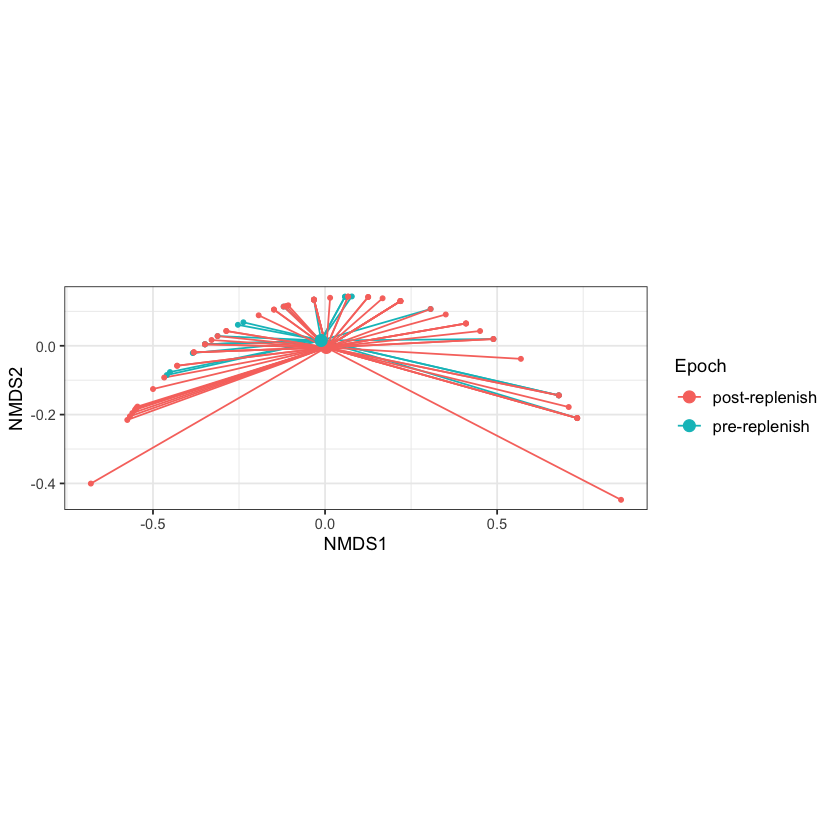

In [11]:
### --------PLOT NMDS PRE vs POST-----------------------------------------------
data_scores <- as.data.frame(scores(nmds))

scores <- cbind(as.data.frame(data_scores), Epoch = taxa.env$epoch)
centroids <- aggregate(cbind(NMDS1,NMDS2) ~ Epoch, data=scores, FUN=mean)
seg <- merge(scores, setNames(centroids, c('Epoch','NMDS1','NMDS2')),by='Epoch', sort=FALSE)

ggplot(scores, aes(x = NMDS1, y = NMDS2, colour = Epoch )) +
  geom_segment(aes(x=NMDS1.x, y=NMDS2.x, xend=NMDS1.y, yend=NMDS2.y), data=seg) +
  
  geom_point(data = centroids, size = 3) +                    # add centroids
  geom_point(size=1) +                                              
  coord_fixed()+                                              
  theme_bw()+ 
  theme(legend.position="right",legend.text=element_text(size=10),legend.direction='vertical')

## Beta Dispersion & Dispersion Test for Homogeneity of Variance

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Groups,1,0.006224337,0.006224337,0.393568,0.5323101
Residuals,76,1.201951238,0.015815148,NA,NA



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df  Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     1 0.00622 0.0062243 0.3936    999  0.502
Residuals 76 1.20195 0.0158151                     

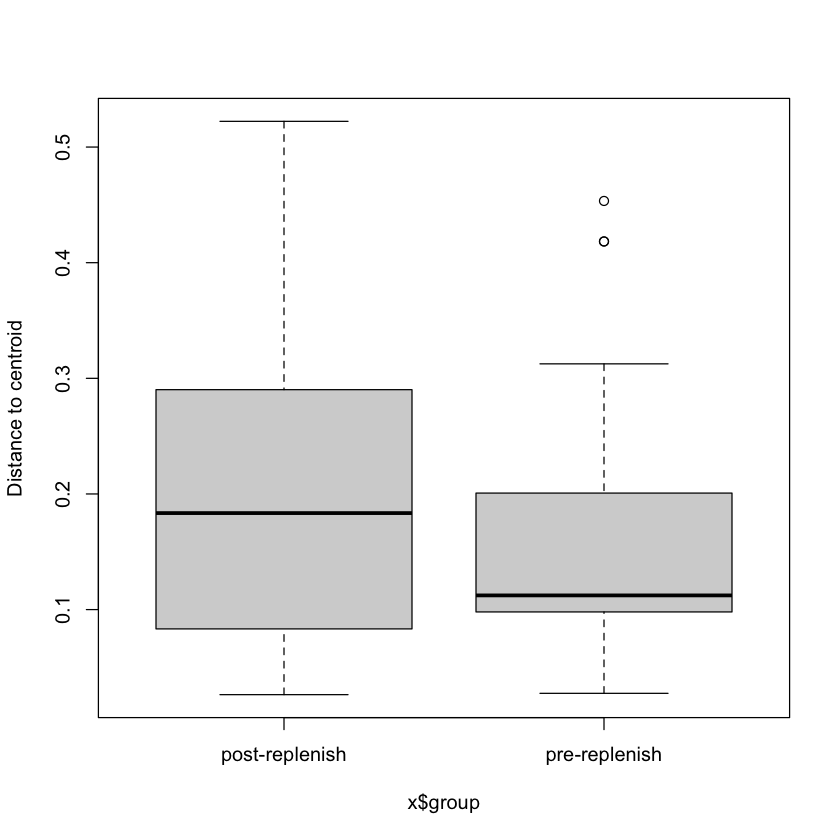

In [12]:
# time:
bdt <- betadisper(taxa.dist, taxa.env$epoch)    # computes PCoA result!
boxplot(bdt)
anova(bdt)   # F-Test
permutest(bdt) # permutation test   (not significant means pre and post dispersion is alike)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Groups,1,0.02123005,0.02123005,1.085468,0.3007804
Residuals,76,1.48643999,0.01955842,NA,NA



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df  Sum Sq  Mean Sq      F N.Perm Pr(>F)
Groups     1 0.02123 0.021230 1.0855    999  0.285
Residuals 76 1.48644 0.019558                     

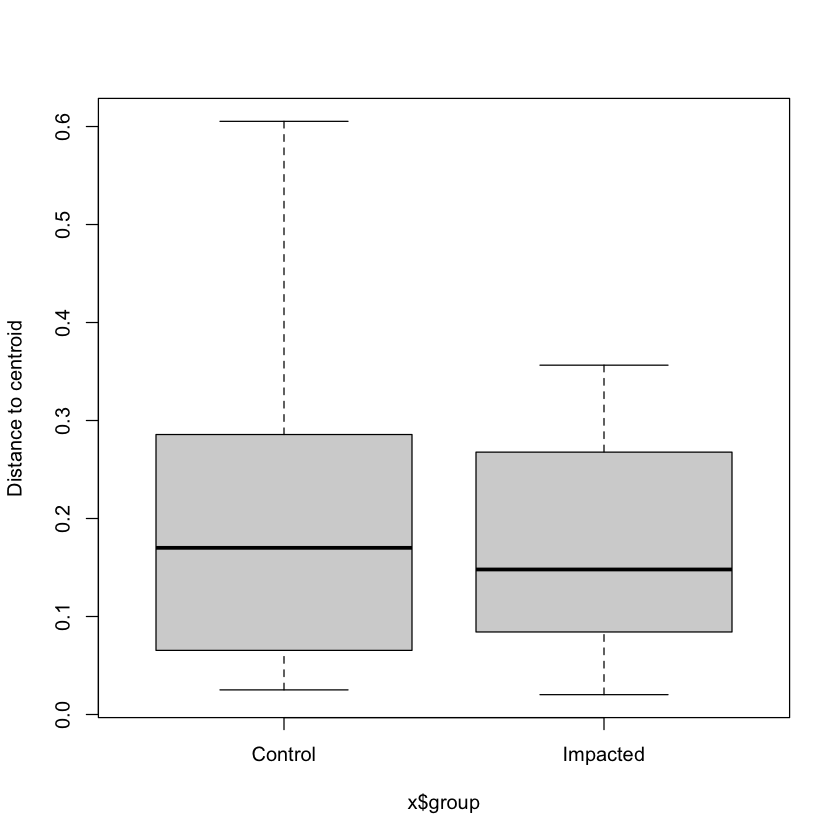

In [13]:
# space:
bds <- betadisper(taxa.dist, taxa.env$area)    # computes PCoA result!
boxplot(bds)
anova(bds)   # F-Test
permutest(bds) # permutation test   (not significant means pre and post dispersion is alike)